In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image
import cv2 
import csv

In [29]:
#Call the images
filename    = "E:/m009/basler/*.bmp" #intensity no temperature
filename_2  = "E:/m011/basler/*.bmp" #intensity with temperature
file_list   = glob.glob(filename)
file_list_2 = glob.glob(filename_2)
fpp         = 50
N_cycles    = len(file_list) // fpp
N_cycles_2  = len(file_list_2) // fpp
file_list   = file_list[:(fpp*N_cycles)]
file_list_2 = file_list_2[:(fpp*N_cycles_2)]
img_shape   = np.array(Image.open(file_list[0])).shape
img_shape_2 = np.array(Image.open(file_list_2[0])).shape

#Call every 50 frames
pixel   = []
pixel_2 = []
for i_f in range(1):
    sibling_frames = np.empty((img_shape[0], img_shape[1], N_cycles))
    for i_c in range(N_cycles):
        img = Image.open(file_list[i_f + i_c * fpp])  
        sibling_frames[:,:,i_c] = np.array(img, dtype=float)  
        pixel.append(sibling_frames[:,:,i_c]) 
    print(i_f)

for i_f in range(fpp):
    sibling_frames_2 = np.empty((img_shape_2[0], img_shape_2[1], N_cycles_2))
    for i_c in range(N_cycles_2):
        img_2 = Image.open(file_list_2[i_f + i_c * fpp])  
        sibling_frames_2[:,:,i_c] = np.array(img_2, dtype=float) 
        pixel_2.append(sibling_frames_2[:,:,i_c])

pixel_ar   = np.array(pixel)
pixel_ar_2 = np.array(pixel_2)

#Average frames
avg        = np.mean(pixel_ar, axis=0)
avg_2      = np.mean(pixel_ar_2, axis=0)

#Background correction and normalization
delta_I    = pixel_ar - avg
norm       = delta_I / avg
delta_I_2  = pixel_ar_2 - avg_2
norm_2     = delta_I_2 / avg_2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


KeyboardInterrupt: 

(Text(0.5, 0, 'frames'), Text(0, 0.5, 'intensity'))

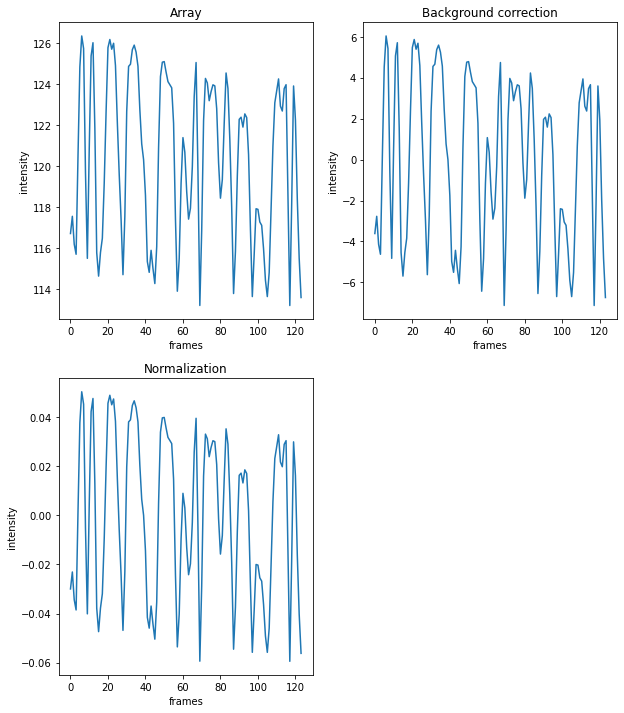

In [27]:
#Show the result in graph
graph    = plt.figure(figsize=(10, 12))
rows     = 2
columns  = 2
graph.add_subplot(rows, columns, 1)
plt.plot(np.mean(np.mean(pixel_ar, axis =2), axis=1))
plt.title("Array")
plt.xlabel('frames'),plt.ylabel('intensity')

graph.add_subplot(rows, columns, 2)
plt.plot(np.mean(np.mean(delta_I, axis =2), axis=1))
plt.title("Background correction")
plt.xlabel('frames'),plt.ylabel('intensity')

graph.add_subplot(rows, columns, 3)
plt.plot(np.mean(np.mean(norm, axis =2), axis=1))
plt.title("Normalization")
plt.xlabel('frames'),plt.ylabel('intensity')


Text(0.5, 1.0, 'Normalization')

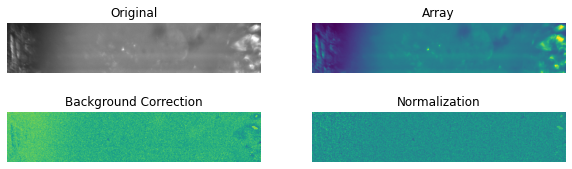

In [4]:
#Show the result in picture
fig      = plt.figure(figsize=(10, 3))
rows     = 2
columns  = 2
fig.add_subplot(rows, columns, 1)
Image1  = cv2.imread('E:/m009/basler/Basler acA2440-35um (23517289)_20220428_142505007_0001.bmp')
plt.axis('off')
plt.title("Original")
plt.imshow(Image1)
fig.add_subplot(rows, columns, 2)
plt.imshow(pixel_ar[0,:,:])
plt.axis('off')
plt.title("Array")
fig.add_subplot(rows, columns, 3)
plt.imshow(delta_I[0,:,:])
plt.axis('off')
plt.title("Background Correction")
fig.add_subplot(rows, columns, 4)
plt.imshow(norm[0,:,:])
plt.axis('off')
plt.title("Normalization")

In [158]:
#Convert array to image
for x in range(N_cycles):
    plt.imsave(f"E:/m009/image/im__{x:05}.bmp", norm[x,:,:])

In [157]:
for x in range(N_cycles_2):
    plt.imsave(f"E:/m014/image/im__{x:05}.bmp", norm_2[x,:,:])

In [5]:
img_2  = []
f_name = "E:/m009/image/*.bmp"
for fn in glob.glob(f_name):
    img  = cv2.imread(fn)
    img_2.append(img)
#Create video
height, width, layers = img.shape
size = (width,height)
out  = cv2.VideoWriter('E:/Recording3.avi', cv2.VideoWriter_fourcc(*'DIVX'),3,size)
for i in range(N_cycles):
    out.write(img_2[i])
cv2.destroyAllWindows()
out.release

<function VideoWriter.release>

In [6]:
img_4    = []
f_name_2 = "E:/m014/image/*.bmp"
for fn_2 in glob.glob(f_name_2):
    img_2  = cv2.imread(fn_2)
    img_4.append(img_2)
#Create video
height, width, layers = img_2.shape
size = (width,height)
out  = cv2.VideoWriter('E:/Recording4.avi', cv2.VideoWriter_fourcc(*'DIVX'),3,size)
for i in range(N_cycles_2):
    out.write(img_4[i])
cv2.destroyAllWindows()
out.release

<function VideoWriter.release>

In [17]:
np.mean(np.mean(pixel_ar, axis =2), axis=1).shape
print(pixel_ar.shape)

(124, 120, 612)


(Text(0.5, 0, 'frames'), Text(0, 0.5, 'intensity'))

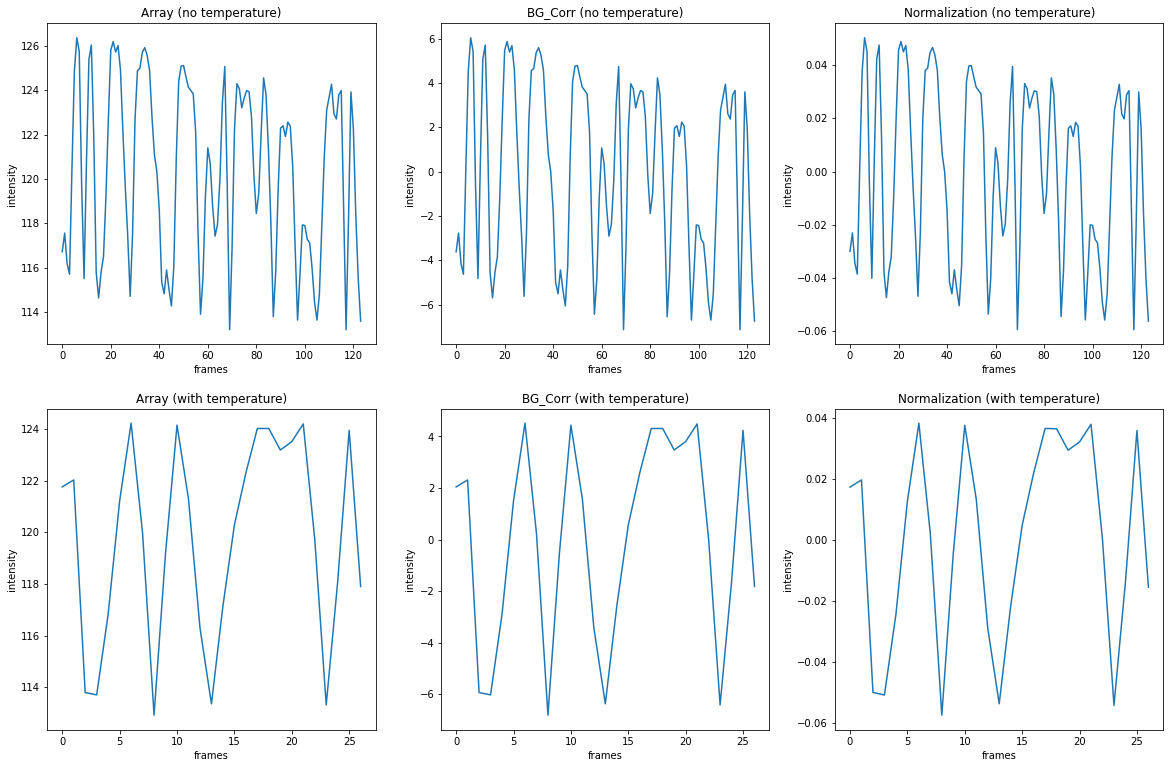

In [19]:
#Show the result in graph
graph_2  = plt.figure(figsize=(20, 13))
rows     = 2
columns  = 3

graph_2.add_subplot(rows, columns, 1)
plt.plot(np.mean(np.mean(pixel_ar, axis =2), axis=1))
plt.title("Array (no temperature)")
plt.xlabel('frames'),plt.ylabel('intensity')
graph_2.add_subplot(rows, columns, 4)
plt.plot(np.mean(np.mean(pixel_ar_2, axis =2), axis=1))
plt.title("Array (with temperature)")
plt.xlabel('frames'),plt.ylabel('intensity')

graph_2.add_subplot(rows, columns, 2)
plt.plot(np.mean(np.mean(delta_I, axis =2), axis=1))
plt.title("BG_Corr (no temperature)")
plt.xlabel('frames'),plt.ylabel('intensity')
graph_2.add_subplot(rows, columns, 5)
plt.plot(np.mean(np.mean(delta_I_2, axis =2), axis=1))
plt.title("BG_Corr (with temperature)")
plt.xlabel('frames'),plt.ylabel('intensity')

graph_2.add_subplot(rows, columns, 3)
plt.plot(np.mean(np.mean(norm, axis =2), axis=1))
plt.title("Normalization (no temperature)")
plt.xlabel('frames'),plt.ylabel('intensity')
graph_2.add_subplot(rows, columns, 6)
plt.plot(np.mean(np.mean(norm_2, axis =2), axis=1))
plt.title("Normalization (with temperature)")
plt.xlabel('frames'),plt.ylabel('intensity')

Text(0.5, 1.0, 'Norm (with temp)')

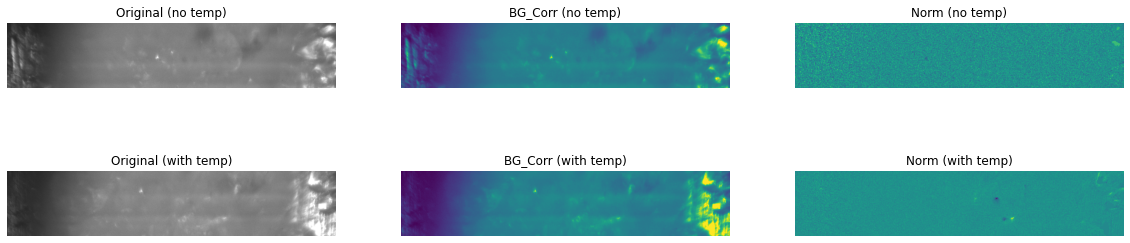

In [154]:
#Show the result in picture
fig_2     = plt.figure(figsize=(20, 5))
rows_2    = 2
columns_2 = 3

fig_2.add_subplot(rows_2, columns_2, 1)
Image1  = cv2.imread('E:/m009/basler/Basler acA2440-35um (23517289)_20220428_142505007_0001.bmp')
plt.axis('off')
plt.title("Original (no temp)")
plt.imshow(Image1)
fig_2.add_subplot(rows_2, columns_2, 4)
Image2  = cv2.imread('E:/m011/basler/Basler acA2440-35um (23517289)_20220428_163041044_0001.bmp')
plt.axis('off')
plt.title("Original (with temp)")
plt.imshow(Image2)

fig_2.add_subplot(rows_2, columns_2, 2)
plt.imshow(pixel_ar[0,:,:])
plt.axis('off')
plt.title("BG_Corr (no temp)")
fig_2.add_subplot(rows_2, columns_2, 5)
plt.imshow(pixel_ar_2[0,:,:])
plt.axis('off')
plt.title("BG_Corr (with temp)")

fig_2.add_subplot(rows_2, columns_2, 3)
plt.imshow(norm[0,:,:])
plt.axis('off')
plt.title("Norm (no temp)")
fig_2.add_subplot(rows_2, columns_2, 6)
plt.imshow(norm_2[0,:,:])
plt.axis('off')
plt.title("Norm (with temp)")

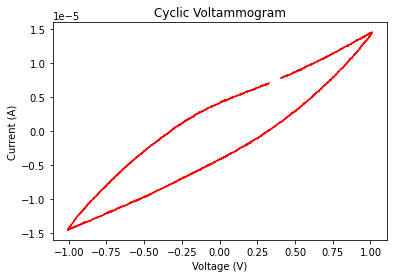

In [155]:
# Call dataframe
files = 'E:/m014/waveforms/acq0079.csv'
df    = pd.read_table(files, sep=',', comment='#')

df_time = df['Time (s)']
df_chn1 = df['Channel 1 (V)']
df_chn2 = df['Channel 2 (V)']
resistance = 39000
df_y    = df_chn2/resistance

plt.plot(df_chn1,df_y,'r')
plt.title("Cyclic Voltammogram")
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.show()